In [1]:
# Import Data Manipulation Library 
import pandas as pd
import numpy as np 
# Import Data visulaization Library 
import seaborn as sns
import matplotlib.pyplot as plt
# Import filter Warnings Library 
import warnings
warnings.filterwarnings('ignore')
# Import Logging
import logging 
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log',force = True)
#Import Sci-kit Learn Libraries for model building
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

#Importing Metrics for Regression Model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
logging.info('Import Dataset For Model Building...')

In [3]:
# Import dataset from URL 
url = 'https://raw.githubusercontent.com/TechAnjum/CementPrediction_model/refs/heads/main/Concrete_Data.csv'
df = pd.read_csv(url)
df.sample(frac = 1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
36,237.5,237.5,0.0,228.0,0.0,932.0,594.0,28,30.08
675,183.9,122.6,0.0,203.5,0.0,959.2,800.0,90,32.53
407,165.0,128.5,132.1,175.1,8.1,1005.8,746.6,3,19.42
351,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,28,45.94
497,355.0,19.0,97.0,145.0,13.1,967.0,871.0,28,44.03
...,...,...,...,...,...,...,...,...,...
797,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,180,51.04
966,154.8,0.0,142.8,193.3,9.1,1047.4,696.7,28,12.46
292,182.0,45.2,122.0,170.2,8.2,1059.4,780.7,56,43.50
406,165.0,0.0,143.6,163.8,0.0,1005.6,900.9,3,14.40


In [4]:
# Checking Data Columns
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

# OLS (ordenary Least Square ) Regression Analysis

In [6]:
import statsmodels.api as sm
X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis =1)
y = df['Concrete compressive strength(MPa, megapascals) ']

In [7]:
X = sm.add_constant(X)

In [8]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.616
Model:                                                          OLS   Adj. R-squared:                  0.613
Method:                                               Least Squares   F-statistic:                     204.3
Date:                                              Thu, 05 Jun 2025   Prob (F-statistic):          6.29e-206
Time:                                                      20:31:00   Log-Likelihood:                -3869.0
No. Observations:                                              1030   AIC:                             7756.
Df Residuals:                                                  1021   BIC:                             7800.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement (component 1)(kg in a m^3 mixture)                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)                0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0181      0.009      1.926      0.054      -0.000       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0202      0.011      1.887      0.059      -0.001       0.041
Age (day)                                                 0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Explorartory Data Analysis 

In [10]:
# Checking Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [11]:
# Checking Descriptive Stats: EDA 
# Univariate Analysis 
from collections import OrderedDict

stats = []
for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurt()
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)

report

,Feature,Mean,Median,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,Cement (component 1)(kg in a m^3 mixture),281.167864,272.900,192.375,350.000,157.625,104.506364,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,73.895825,22.000,0.000,142.950,142.950,86.279342,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),54.188350,0.000,0.000,118.300,118.300,63.997004,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),181.567282,185.000,164.900,192.000,27.100,21.354219,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.204660,6.400,0.000,10.200,10.200,5.973841,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,972.918932,968.000,932.000,1029.400,97.400,77.753954,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),773.580485,779.500,730.950,824.000,93.050,80.175980,-0.253010,-0.102177
7,Age (day),45.662136,28.000,7.000,56.000,49.000,63.169912,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",35.817961,34.445,23.710,46.135,22.425,16.705742,0.416977,-0.313725


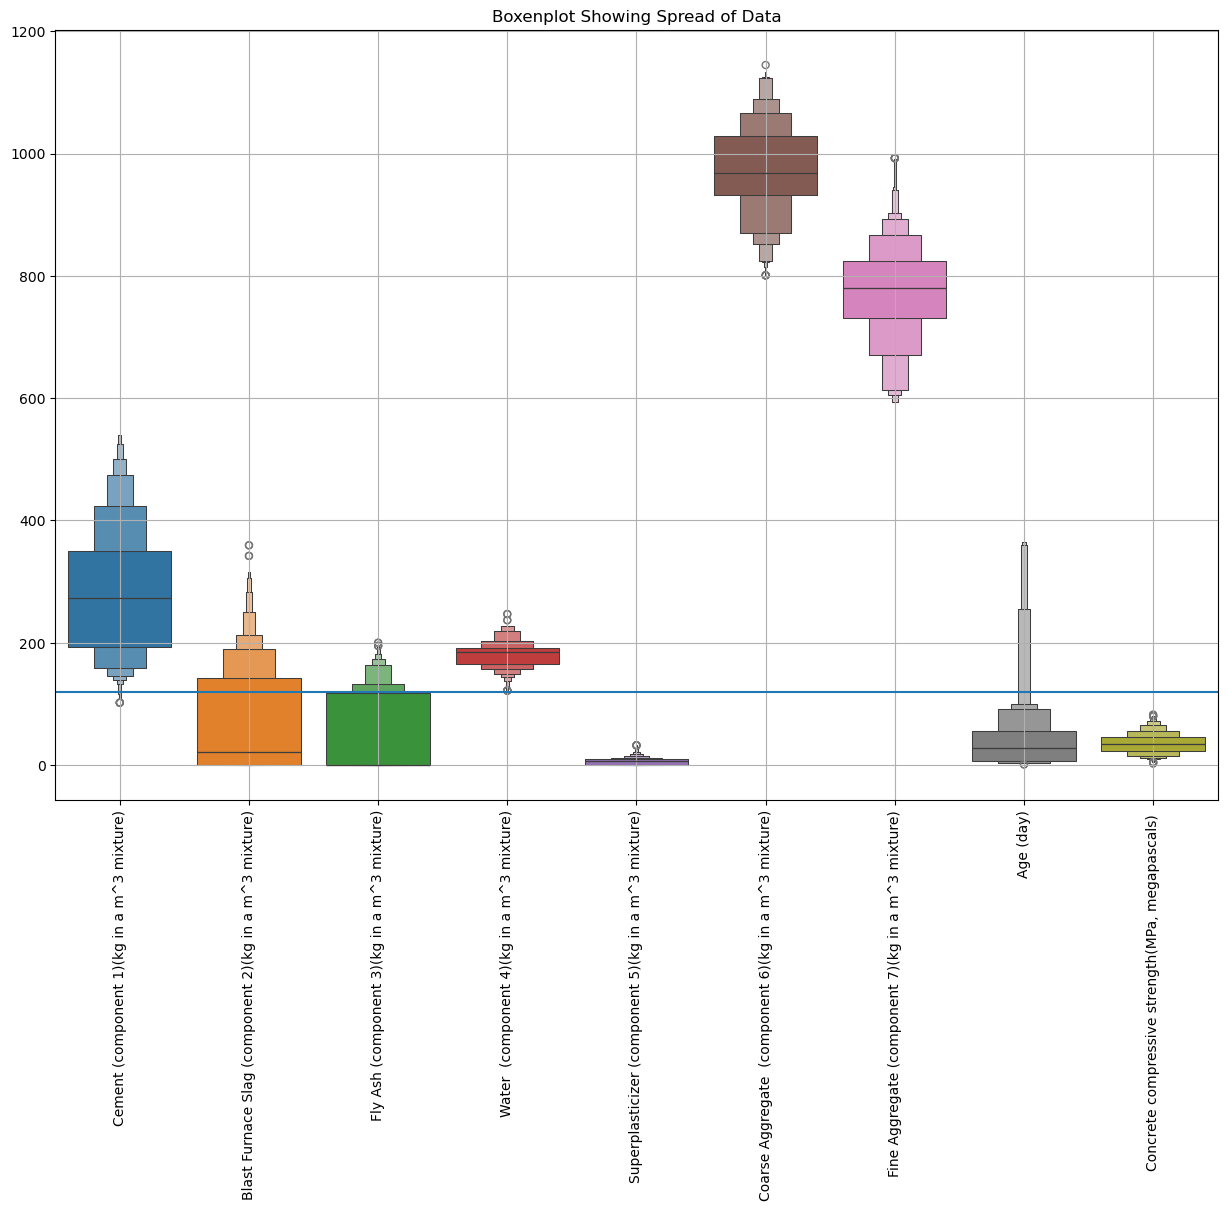

In [12]:
'''
Note:
1. Positive Kurtosis : LeptoKurtic
2. Normal Distribution : MesoKurtic 
3. Negative Distribution : PlatyKurtic
............................................
1. Positive Skewness : mode<median<mean
2. No Skewness : Normally Distributed :mean = median = mode 
3. Negative Skewness : mean<median<mode 
'''
plt.figure(figsize = (15,10))
sns.boxenplot(df)
plt.axhline(120)
plt.xticks(rotation = 90)
plt.title('Boxenplot Showing Spread of Data')
plt.grid()
plt.show()

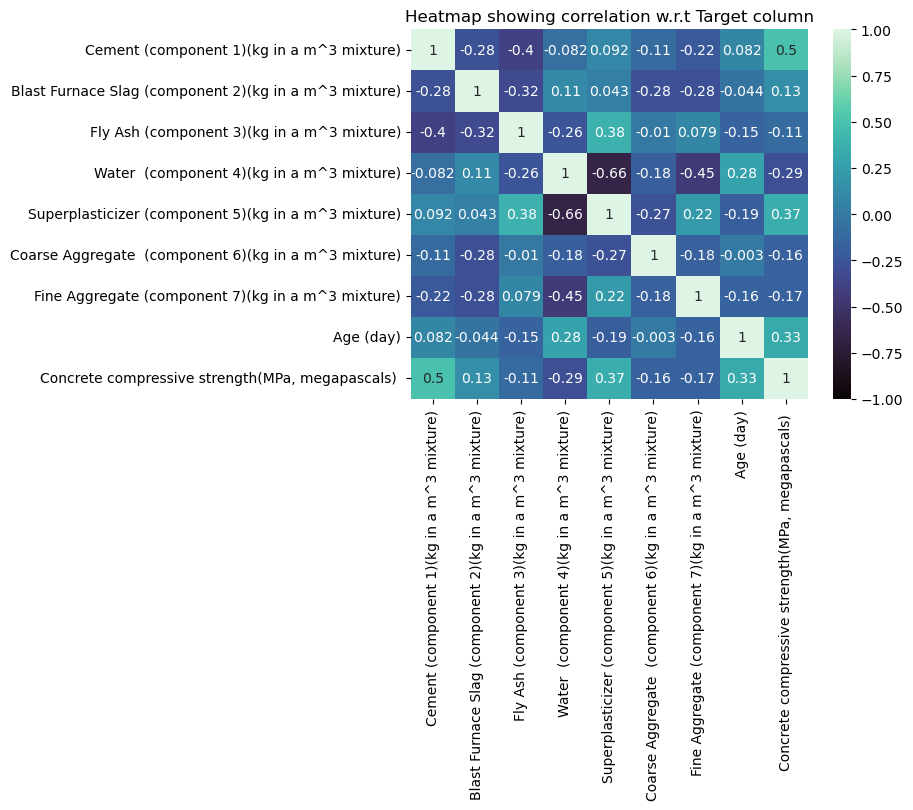

In [13]:
# Heatmap 
sns.heatmap(df.corr(),annot = True , center = 0 , vmax = 1 ,vmin = -1 , cmap ='mako')
plt.title('Heatmap showing correlation w.r.t Target column')
plt.show()

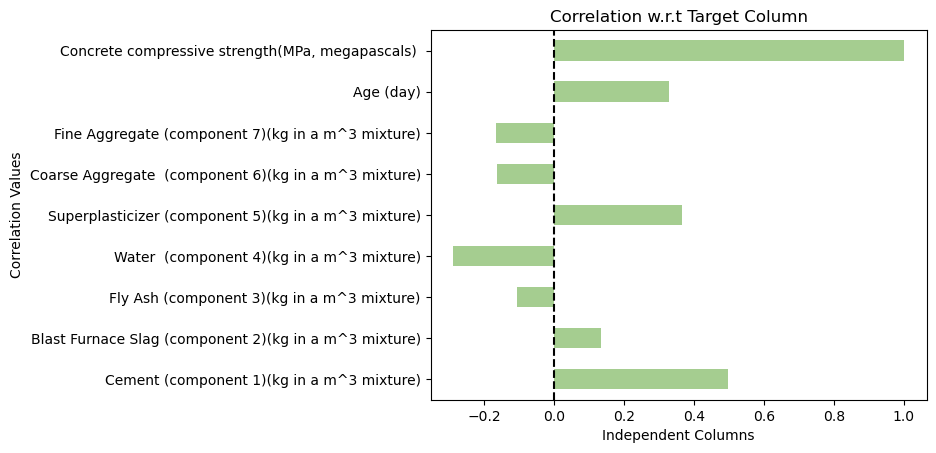

In [14]:
df.corr()['Concrete compressive strength(MPa, megapascals) '].plot(kind='barh',cmap = 'crest')
plt.axvline(0,linestyle = '--',color='black')
plt.title('Correlation w.r.t Target Column')
plt.ylabel('Correlation Values')
plt.xlabel('Independent Columns')
plt.show()

In [15]:
# Checking Top Five rows of Dataset 
'''
1. As the Dataset contains no categorial column, hence no need of converting categorical column to numerical column.
2. No missing value is present in the dataset.
'''
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [16]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [17]:
#Preventing Data Leakage

# Step 01: Split the dataset in X and y
# Where X: Independent Column and y: Dependent Column : Target column

X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis = 1) # drops inside X, but presnt in df
y = df['Concrete compressive strength(MPa, megapascals) ']

# Step 02: Using Train Test Split
#test_size lies between 0.20 to 0.35(20-30 is enough)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42) 

# Step 03: Using Scaling Technique
sc = MinMaxScaler()

#Seen data
X_train = sc.fit_transform(X_train)

# Unseen Data
X_test = sc.transform(X_test)

In [18]:
X_train.max(), X_train.min() # perfect ranges between 0 and 1

(1.0000000000000002, 0.0)

# Model Building 

In [20]:
# Linear Regression 
from sklearn.linear_model import LinearRegression 

# Fit Model is always on training or seen dataset(test)
LR = LinearRegression().fit(X_train,y_train)

# Prediction Value based on Unseen Data
y_pred_LR = LR.predict(X_test)

#y_test = actual,y_pred = predicted 
print('Model Accuracy for Linear Regression',r2_score(y_test,y_pred_LR))

Model Accuracy for Linear Regression 0.5943782479239215


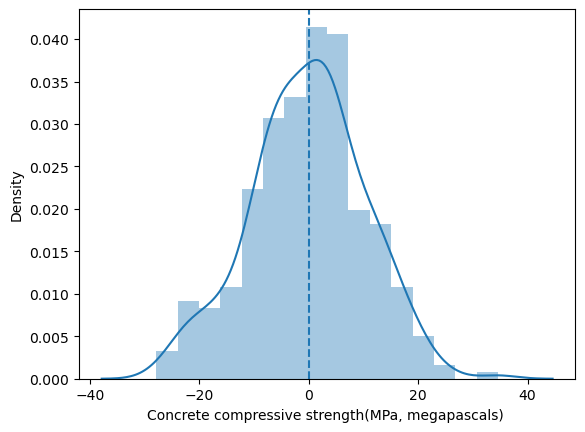

In [21]:
sns.distplot(y_test-y_pred_LR)
plt.axvline(0,linestyle= '--')

Text(0, 0.5, 'Y_pred')

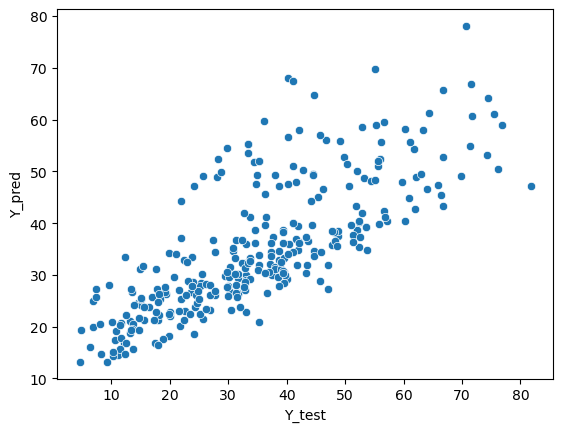

In [22]:
sns.scatterplot(x = y_test , y = y_pred_LR)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

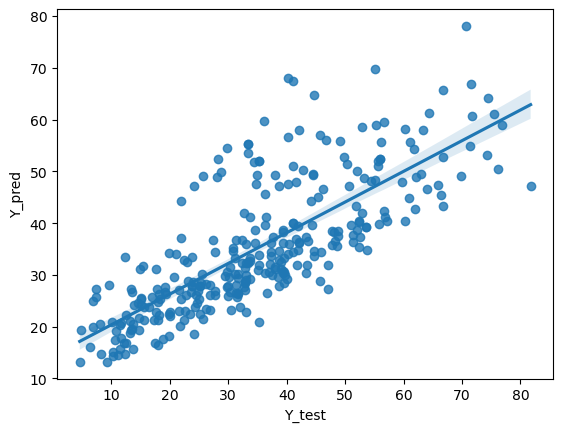

In [23]:
# Model Performance 
sns.regplot(x = y_test , y= y_pred_LR) # regression plot
plt.xlabel('Y_test') # actual 
plt.ylabel('Y_pred') # predicted value 
plt.show() # Some patterns and data points are not captured so accuracy decreases

In [24]:
# Evaluate Coefficient 
LR.coef_ # coefficient*x+c, total 8 columns

array([ 54.95342731,  41.97459796,  17.55268553, -11.34057972,
        12.76701497,   9.66978699,  14.4992847 ,  41.47485093])

In [25]:
# Evaluate Constant Value
LR.intercept_

-13.616932642237423

In [26]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

DT = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

print('The Model Accuracy for Decision Tree Regressor', r2_score(y_test,y_pred_DT))

The Model Accuracy for Decision Tree Regressor 0.8272031536047006


<Axes: xlabel='Concrete compressive strength(MPa, megapascals) '>

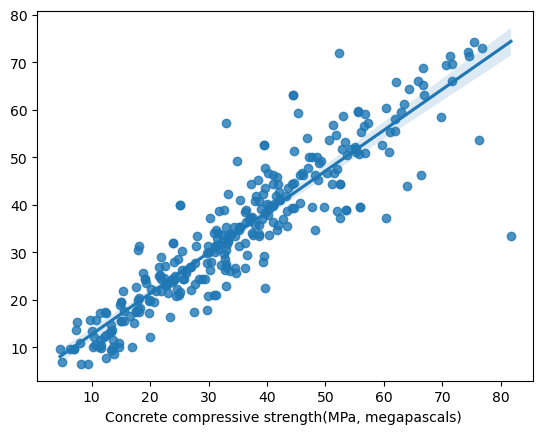

In [27]:
# Model Performance Graph 
sns.regplot(x= y_test ,y = y_pred_DT)
# y_test - actual(x-axis),y_pred - predicted 
# error avg/bias/loss
# Loss - Mean absolute error ,mean squared error(used in ANN)

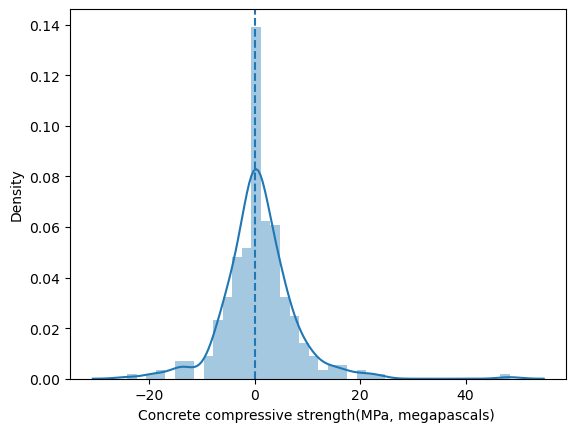

In [28]:
sns.distplot(y_test - y_pred_DT)
plt.axvline(0,linestyle = "--")

# Random Forest Regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('The Model Accuracy for Decision Tree Regressor',r2_score(y_test,y_pred_RF))

The Model Accuracy for Decision Tree Regressor 0.8858756184687576


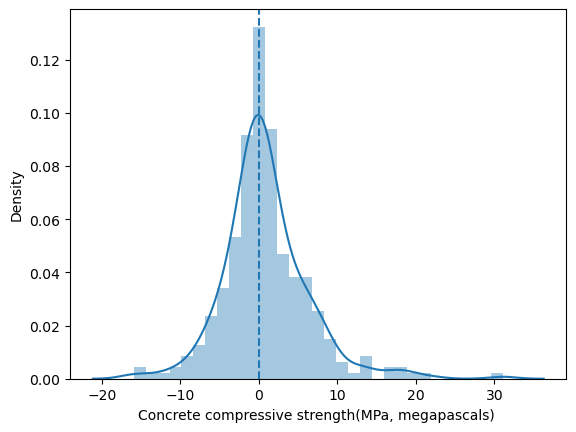

In [31]:
sns.distplot(y_test - y_pred_RF)
plt.axvline(0,linestyle = "--")

In [32]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

<Axes: >

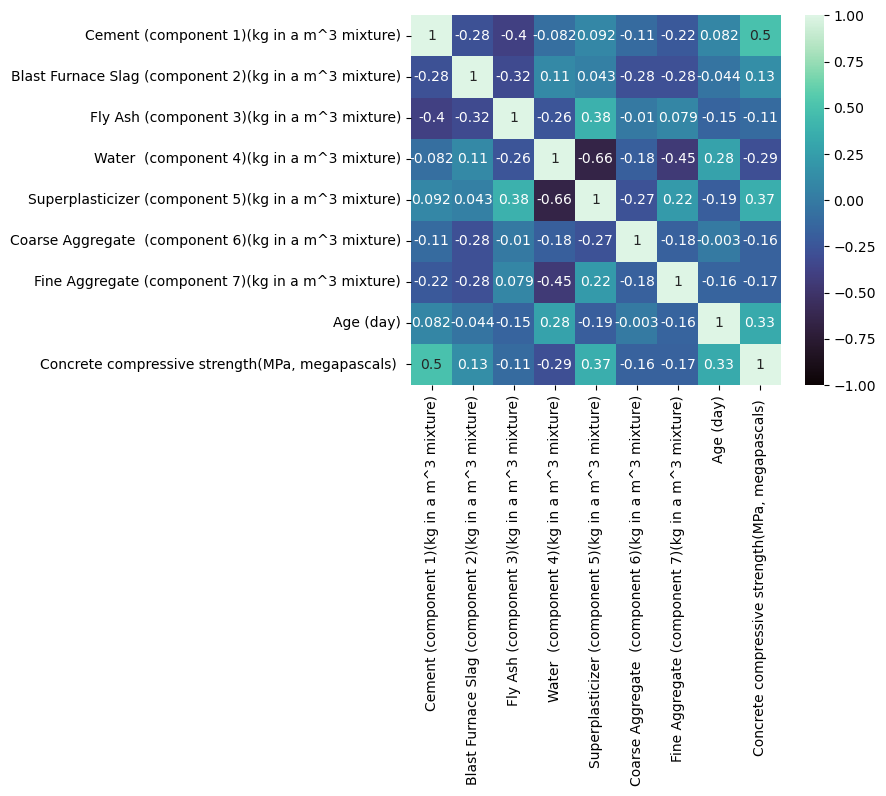

In [33]:
sns.heatmap(df.corr() , cbar = True,square=True,annot = True,center = 0, vmax = 1 ,vmin = -1 ,cmap='mako')

In [34]:
RF.feature_importances_

array([0.32809473, 0.07517495, 0.02040679, 0.11792261, 0.06462973,
       0.02604278, 0.03527406, 0.33245436])

In [35]:
Features = RF.feature_importances_

In [36]:
feature_names = X.columns
importance_df = pd.Series(Features,index = feature_names)
importance_df

Cement (component 1)(kg in a m^3 mixture)                0.328095
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.075175
Fly Ash (component 3)(kg in a m^3 mixture)               0.020407
Water  (component 4)(kg in a m^3 mixture)                0.117923
Superplasticizer (component 5)(kg in a m^3 mixture)      0.064630
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.026043
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.035274
Age (day)                                                0.332454
dtype: float64

In [37]:
# Classifer - for binary nd categorical 
# Regressor - for numerical 

In [38]:
!pip install xgboost

In [39]:
# Boosting Algorithms
# Using XgBoost Algorithm
# pip install xgboost
import xgboost as xg
xgb = xg.XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
print('Model Accuracy fro XGBoost Regressor',r2_score(y_test,y_pred_xgb))

Model Accuracy fro XGBoost Regressor 0.9104444067517969


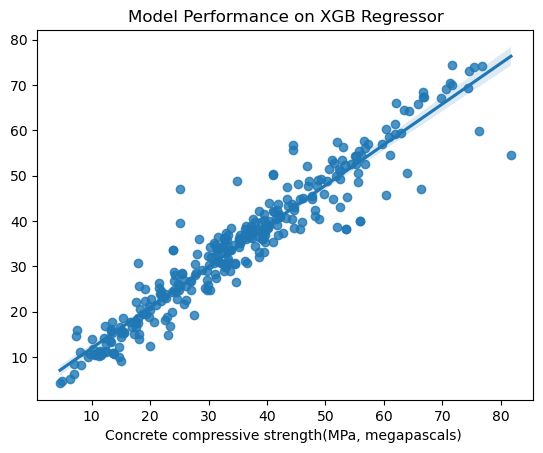

In [40]:
# Model performance for XGB 
sns.regplot(x = y_test,y = y_pred_xgb)
plt.title('Model Performance on XGB Regressor')
plt.show()

In [41]:
# Using AddBoosting Algorithm 
from sklearn.ensemble import AdaBoostRegressor
ADAB = AdaBoostRegressor().fit(X_train,y_train)
y_pred_ADAB = ADAB.predict(X_test)
print('Model Accuracy for AdaBoost Regressor',r2_score(y_test,y_pred_ADAB))

Model Accuracy for AdaBoost Regressor 0.7812627135643867


In [42]:
# Using gradient Boosting ALgorithm
from sklearn.ensemble import GradientBoostingRegressor
GRE = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_GRE = GRE.predict(X_test)
print('Model Accuracy fro AdaBoost Regressor',r2_score(y_test,y_pred_GRE))

Model Accuracy fro AdaBoost Regressor 0.8906692835228103


In [43]:
# Using KNN Algorithm 
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor().fit(X_train,y_train)
y_pred_KNN = KNN.predict(X_test)
print('Model Accuracy for KNN Regressor',r2_score(y_test,y_pred_KNN))

Model Accuracy for KNN Regressor 0.6457281524418169


In [44]:
from sklearn.model_selection import RandomizedSearchCV
# Initialize the model 
RF = RandomForestRegressor(random_state=42)
# Define hyperparameter grid
param_dist={
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2']
}
# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=RF,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs= -1
)
# Fit to Training Data
random_search.fit(X_train,y_train)
# Best model
best_rf = random_search.best_estimator_
print("Best Parameters:",random_search.best_params_)
print("Best R2 Score on CV:",random_search.best_score_)


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best R2 Score on CV: 0.8932331477435091
